In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import time
import os
import matplotlib.pyplot as plt
import numpy as np
from funimag import superpixel_analysis as sup

# Set Demo Dataset Location
ext = os.path.join("..", "example_movies")
filename = os.path.join(ext, "demoMovie.tif")

# Load Data

In [2]:
from skimage import io
mov = io.imread(filename).transpose([1,2,0])[:60,:60,:]
mov = np.asarray(mov,order='C',dtype=np.float64)
print(mov.shape)
fov_height, fov_width, num_frames = mov.shape

(60, 60, 2000)


# Run pipeline

# Run Demixing Pipeline on raw data

In [ ]:
rlt=sup.demix_whole_data(mov, cut_off_point=[0.8], length_cut=[10], th=[2], pass_num=1,
                    residual_cut = [0.6], corr_th_fix=0.31, max_allow_neuron_size=0.3,
                    merge_corr_thr=0.6, merge_overlap_thr=0.6, num_plane=1, patch_size=[100,100],
                    plot_en=False, TF=True, fudge_factor=1, text=True, bg=False,
                    max_iter=35, max_iter_fin=50, update_after=4)

# Produce Diagnostics

## Superpixel plots

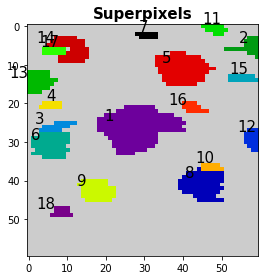

In [4]:
sup.pure_superpixel_single_plot(rlt["superpixel_rlt"][0]["connect_mat_1"],
                                rlt["superpixel_rlt"][0]["unique_pix"],
                                rlt["superpixel_rlt"][0]["brightness_rank_sup"],
                                text=True,
                                pure=False);

## Pure superpixel plots

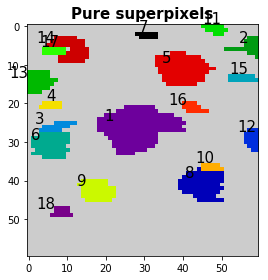

In [5]:
sup.pure_superpixel_single_plot(rlt["superpixel_rlt"][0]["connect_mat_1"],
                                rlt["superpixel_rlt"][0]["pure_pix"],
                                rlt["superpixel_rlt"][0]["brightness_rank"],
                                text=True,
                                pure=True);

## Cummulative spatial components

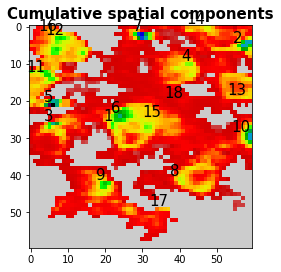

In [6]:
sup.spatial_sum_plot_single((rlt["fin_rlt"]["a"]),mov.shape[:2],text=True);

# Run Demixing Pipeline on Low Rank Decomposed Movies

## User guide

Recommend running PMD then using the default parameters in demix function first.

Tuning parameters: 

i) See detailed description of each parameters in the comments of demix function. 

ii) cut_off_point and length_cut are two key parameters which may need to tune in superpixel initialization. corr_th_fix is another parameter which may need to tune in following NMF step. Other parameters can generally take the default values.


## Load compressed movie

In [ ]:
data = np.load(os.path.join(ext, "demo_results.npz"))
U = data['arr_0']
V = data['arr_1']
mov_denoised = data['arr_2']

In [ ]:
rlt = sup.demix(mov_denoised, U, V, cut_off_point=[0.95], length_cut=[15], th=[2], pass_num=1,
                    residual_cut = [0.6], corr_th_fix=0.31, max_allow_neuron_size=0.3,
                    merge_corr_thr=0.6, merge_overlap_thr=0.6, num_plane=1, patch_size=[100,100],
                    plot_en=False, TF=True, fudge_factor=1, text=True, bg=False,
                    max_iter=35, max_iter_fin=50, update_after=4)